In [6]:
import warnings
warnings.filterwarnings("ignore")

/workspaces/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:22: SyntaxWarning: invalid escape sequence '\d'
  df['Month'] = df['Period'].str.extract('M(\d+)').astype(int)


  Age Group  Year Period  Unemployment_Rate
0     16-19  2024    M09               14.3
1     16-19  2024    M08               14.1
2     16-19  2024    M07               12.4
3     16-19  2024    M06               12.1
4     16-19  2024    M05               12.3
Columns in dataframe: ['Age Group', 'Year', 'Period', 'Unemployment_Rate', 'Month', 'Date']
First few rows of Month column: 0    9
1    8
2    7
3    6
4    5
Name: Month, dtype: int64

Annual Hiring Gap Analysis:
--------------------------------------------------------------------------------
Year    Target    Feasible    Gap    Gap Rate
--------------------------------------------------------------------------------
2024   102,426     162,664  60,238     58.8%
2025   112,456     161,757  49,301     43.8%
2026   123,606     158,130  34,524     27.9%
2027   136,019     154,503  18,484     13.6%
2028   149,859     150,876   1,017      0.7%
2029   160,548     147,249  -13,299     -8.3%
2030   176,924     143,622  -33,302    -18.

/workspaces/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]
/workspaces/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]
/workspaces/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]
/workspaces/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods

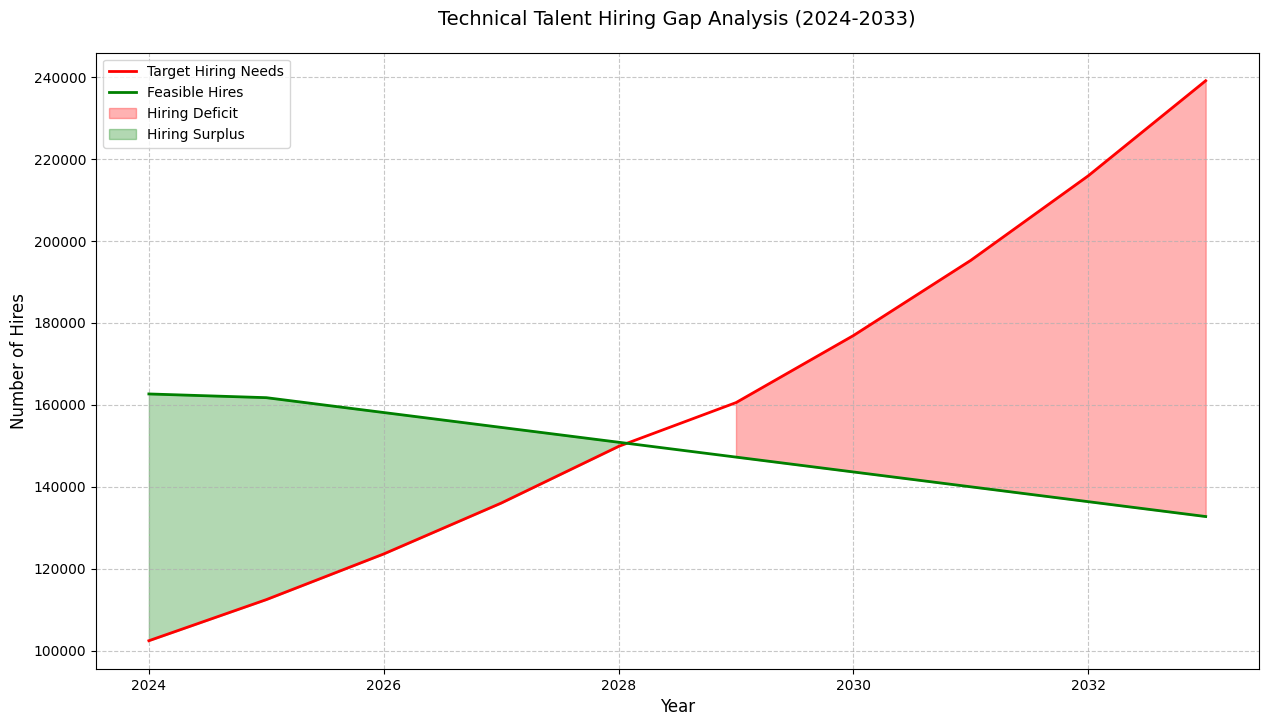

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.append(str(Path().absolute().parent))  # 添加父目录到 Python 路径

from parameters.channel_assumption import channel_population, hiring_channels
from parameters.age_group_assumption import age_group_mapping
from calculator.feasible_to_hire_calculator import predict_unemployment_rates, get_feasible_hires_by_year
from calculator.total_hire_target_calculator import calculate_projections, get_annual_hiring_needs

# Get historical unemployment data
historical_data = pd.read_csv('../data/bls_unemployment_by_age_group.csv')
predictions_by_age = predict_unemployment_rates(historical_data)

# Calculate projections and get hiring needs
df = calculate_projections()
hiring_needs = get_annual_hiring_needs(df)

feasible_hires = get_feasible_hires_by_year(
    channel_population, 
    hiring_channels, 
    predictions_by_age, 
    age_group_mapping
)

# Calculate hiring gap
hiring_gap = pd.DataFrame(index=range(2024, 2034))
hiring_gap['Target_Hires'] = hiring_needs['Total_Hires'].values  # Changed from 'Total_Hires' column
hiring_gap['Feasible_Hires'] = feasible_hires['Feasible_Hires'].astype(float)
hiring_gap['Gap'] = hiring_gap['Feasible_Hires'] - hiring_gap['Target_Hires']
hiring_gap['Gap_Percentage'] = (hiring_gap['Gap'] / hiring_gap['Target_Hires']) * 100

# Create visualization
plt.figure(figsize=(15, 8))
plt.plot(hiring_gap.index, hiring_gap['Target_Hires'].values, 'r-', 
         label='Target Hiring Needs', linewidth=2)
plt.plot(hiring_gap.index, hiring_gap['Feasible_Hires'].values, 'g-', 
         label='Feasible Hires', linewidth=2)
plt.fill_between(hiring_gap.index, 
                hiring_gap['Target_Hires'].values, 
                hiring_gap['Feasible_Hires'].values,
                where=(hiring_gap['Gap'].values < 0),
                color='red', alpha=0.3, label='Hiring Deficit')
plt.fill_between(hiring_gap.index,
                hiring_gap['Target_Hires'].values,
                hiring_gap['Feasible_Hires'].values,
                where=(hiring_gap['Gap'].values >= 0),
                color='green', alpha=0.3, label='Hiring Surplus')

plt.title('Technical Talent Hiring Gap Analysis (2024-2033)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Hires', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

print("\nAnnual Hiring Gap Analysis:")
print("-" * 80)
print("Year    Target    Feasible    Gap    Gap Rate")
print("-" * 80)
for year in hiring_gap.index:
    target = hiring_gap.loc[year, 'Target_Hires']
    feasible = hiring_gap.loc[year, 'Feasible_Hires']
    gap = hiring_gap.loc[year, 'Gap']
    gap_rate = hiring_gap.loc[year, 'Gap_Percentage']
    
    # Changed format specifier from ,d to ,.0f for floating point numbers
    print(f"{year}  {target:>8,.0f}  {feasible:>10,.0f}  {gap:>6,.0f}  {gap_rate:>7.1f}%")


# Output key findings
print("\nKey Findings:")
print("-" * 80)
print(f"1. Average Annual Gap: {hiring_gap['Gap'].mean():,.0f} people")
print(f"2. Largest Gap Year: {hiring_gap['Gap'].idxmin()}, Gap: {hiring_gap['Gap'].min():,.0f} people")
print(f"3. Cumulative 10-Year Gap: {hiring_gap['Gap'].sum():,.0f} people")
print(f"4. Number of Years with Deficit: {(hiring_gap['Gap'] < 0).sum():,d} years")

# Calculate the total deficit that needs to be addressed
total_deficit = abs(hiring_gap.loc[hiring_gap['Gap'] < 0, 'Gap'].sum())
print(f"\nTotal Deficit to Address: {total_deficit:,.0f} people")

plt.show()

**Consider Attrition and Retention**

  Age Group  Year Period  Unemployment_Rate
0     16-19  2024    M09               14.3
1     16-19  2024    M08               14.1
2     16-19  2024    M07               12.4
3     16-19  2024    M06               12.1
4     16-19  2024    M05               12.3
Columns in dataframe: ['Age Group', 'Year', 'Period', 'Unemployment_Rate', 'Month', 'Date']
First few rows of Month column: 0    9
1    8
2    7
3    6
4    5
Name: Month, dtype: int64

Annual Hiring Gap Analysis:
----------------------------------------------------------------------------------------------------
Year    Base Target    Attrition    Retainable    Net Target    Feasible    Gap    Gap Rate
----------------------------------------------------------------------------------------------------
2024      102,426      98,277       46,523      154,180    162,664   8,484      5.5%
2025      112,456     107,592       50,934      169,114    161,757  -7,357     -4.4%
2026      123,606     117,868       55,797      185,677   

/Users/kylewu/Downloads/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]
/Users/kylewu/Downloads/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]
/Users/kylewu/Downloads/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]
/Users/kylewu/Downloads/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  futur

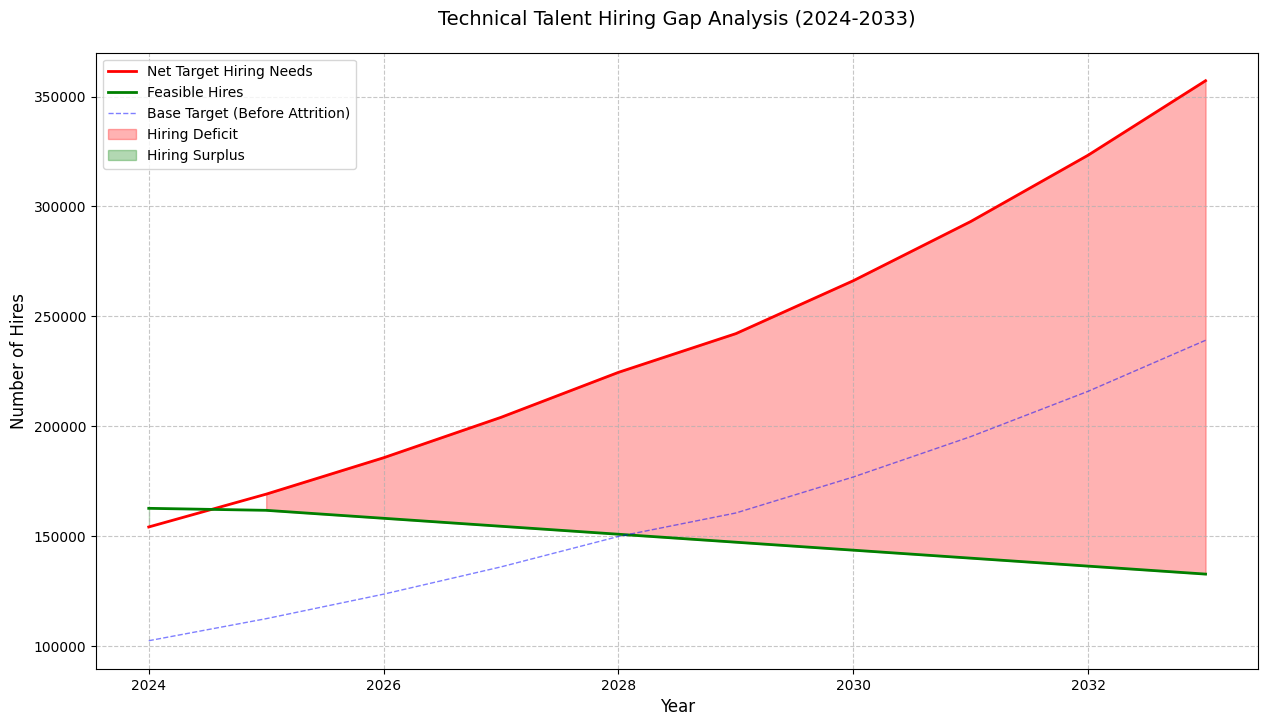

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.append(str(Path().absolute().parent))

from parameters.channel_assumption import channel_population, hiring_channels
from parameters.age_group_assumption import age_group_mapping
from calculator.feasible_to_hire_calculator import predict_unemployment_rates, get_feasible_hires_by_year
from calculator.total_hire_target_calculator import calculate_projections, get_annual_hiring_needs
from calculator.retention_calculator import calculate_detailed_attrition, calculate_retainable_employees

# Get historical unemployment data
historical_data = pd.read_csv('../data/bls_unemployment_by_age_group.csv')
predictions_by_age = predict_unemployment_rates(historical_data)

# Calculate projections and get hiring needs
df = calculate_projections()
hiring_needs = get_annual_hiring_needs(df)

# Get feasible hires
feasible_hires = get_feasible_hires_by_year(
    channel_population, 
    hiring_channels, 
    predictions_by_age, 
    age_group_mapping
)

# Get attrition and retainable numbers
attrition_df = calculate_detailed_attrition('median')
retainable_df = calculate_retainable_employees('median')

attrition_df = attrition_df[attrition_df['Year'].between(2024, 2033)].reset_index(drop=True)
retainable_df = retainable_df[retainable_df['Year'].between(2024, 2033)].reset_index(drop=True)


# Calculate hiring gap
hiring_gap = pd.DataFrame(index=range(2024, 2034))
hiring_gap['Base_Target_Hires'] = hiring_needs['Total_Hires'].values
hiring_gap['Attrition'] = attrition_df['Total_Attrition'].values
hiring_gap['Retainable'] = retainable_df['Total_Retainable'].values
hiring_gap['Net_Target_Hires'] = hiring_gap['Base_Target_Hires'] + hiring_gap['Attrition'] - hiring_gap['Retainable']
hiring_gap['Feasible_Hires'] = feasible_hires['Feasible_Hires'].astype(float)
hiring_gap['Gap'] = hiring_gap['Feasible_Hires'] - hiring_gap['Net_Target_Hires']
hiring_gap['Gap_Percentage'] = (hiring_gap['Gap'] / hiring_gap['Net_Target_Hires']) * 100

# Create visualization
plt.figure(figsize=(15, 8))
plt.plot(hiring_gap.index, hiring_gap['Net_Target_Hires'].values, 'r-', 
         label='Net Target Hiring Needs', linewidth=2)
plt.plot(hiring_gap.index, hiring_gap['Feasible_Hires'].values, 'g-', 
         label='Feasible Hires', linewidth=2)
plt.plot(hiring_gap.index, hiring_gap['Base_Target_Hires'].values, 'b--', 
         label='Base Target (Before Attrition)', linewidth=1, alpha=0.5)

plt.fill_between(hiring_gap.index, 
                hiring_gap['Net_Target_Hires'].values, 
                hiring_gap['Feasible_Hires'].values,
                where=(hiring_gap['Gap'].values < 0),
                color='red', alpha=0.3, label='Hiring Deficit')
plt.fill_between(hiring_gap.index,
                hiring_gap['Net_Target_Hires'].values,
                hiring_gap['Feasible_Hires'].values,
                where=(hiring_gap['Gap'].values >= 0),
                color='green', alpha=0.3, label='Hiring Surplus')

plt.title('Technical Talent Hiring Gap Analysis (2024-2033)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Hires', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

print("\nAnnual Hiring Gap Analysis:")
print("-" * 100)
print("Year    Base Target    Attrition    Retainable    Net Target    Feasible    Gap    Gap Rate")
print("-" * 100)
for year in hiring_gap.index:
    base = hiring_gap.loc[year, 'Base_Target_Hires']
    attrition = hiring_gap.loc[year, 'Attrition']
    retainable = hiring_gap.loc[year, 'Retainable']
    net = hiring_gap.loc[year, 'Net_Target_Hires']
    feasible = hiring_gap.loc[year, 'Feasible_Hires']
    gap = hiring_gap.loc[year, 'Gap']
    gap_rate = hiring_gap.loc[year, 'Gap_Percentage']
    
    print(f"{year}  {base:>11,.0f}  {attrition:>10,.0f}  {retainable:>11,.0f}  {net:>11,.0f}  {feasible:>9,.0f}  {gap:>6,.0f}  {gap_rate:>7.1f}%")

# Output key findings
print("\nKey Findings:")
print("-" * 80)
print(f"1. Average Annual Gap: {hiring_gap['Gap'].mean():,.0f} people")
print(f"2. Largest Gap Year: {hiring_gap['Gap'].idxmin()}, Gap: {hiring_gap['Gap'].min():,.0f} people")
print(f"3. Cumulative 10-Year Gap: {hiring_gap['Gap'].sum():,.0f} people")
print(f"4. Number of Years with Deficit: {(hiring_gap['Gap'] < 0).sum():,d} years")
print(f"5. Average Annual Attrition: {hiring_gap['Attrition'].mean():,.0f} people")
print(f"6. Average Retainable: {hiring_gap['Retainable'].mean():,.0f} people")

# Calculate the total deficit that needs to be addressed
total_deficit = abs(hiring_gap.loc[hiring_gap['Gap'] < 0, 'Gap'].sum())
print(f"\nTotal Deficit to Address: {total_deficit:,.0f} people")

plt.show()

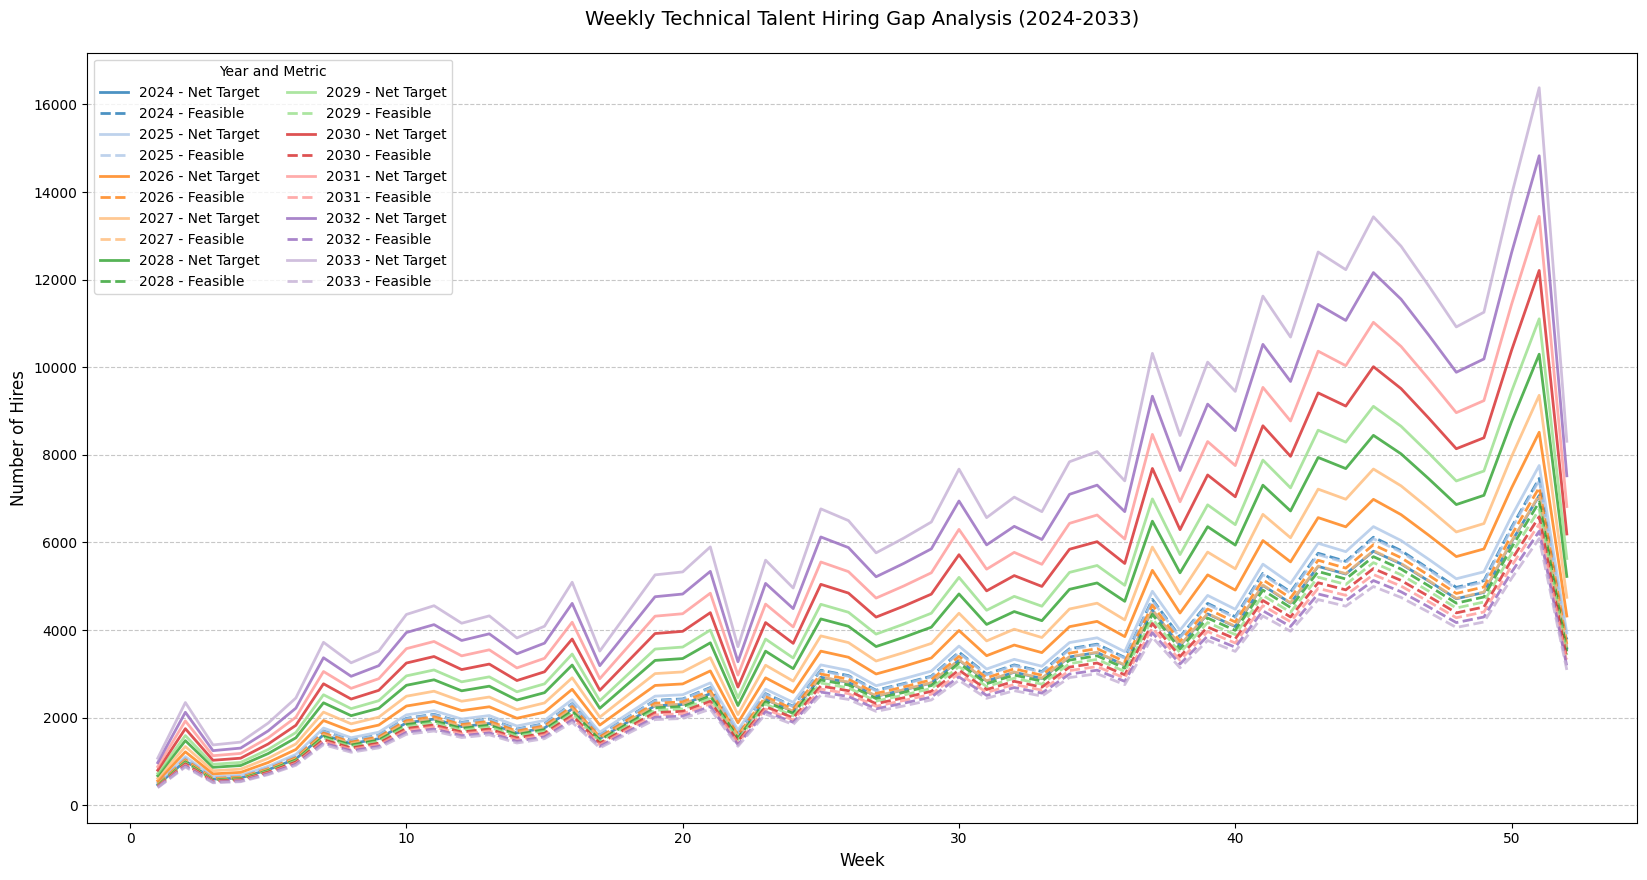

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path().absolute().parent))  # 添加父目录到 Python 路径
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from parameters.weekly_assumption import weekly_hiring_percentages
from calculator.total_hire_target_calculator import calculate_weekly_hiring_gap, calculate_weekly_hiring

hiring_gap = pd.DataFrame({
    "Year": range(2024, 2034),
    "Net_Target_Hires": [154180, 169114, 185677, 204070, 224531, 242151, 266227, 293163, 323346, 357221],
    "Feasible_Hires": [162664, 161757, 158130, 154503, 150876, 147249, 143622, 139995, 136368, 132741]
}).set_index("Year")


####
weekly_hiring_gap_df = calculate_weekly_hiring_gap(hiring_gap, weekly_hiring_percentages)
####

plt.figure(figsize=(20, 10))
colors = plt.cm.tab20.colors  #use a colormap for distinct colors
for i, year in enumerate(range(2024, 2034)):
    year_data = weekly_hiring_gap_df[weekly_hiring_gap_df['Year'] == year]
    plt.plot(
        year_data['Week'],
        year_data['Net_Target_Hires'],
        label=f"{year} - Net Target",
        linestyle='-',
        linewidth=2,
        alpha=0.8,
        color=colors[i % len(colors)])
    plt.plot(
        year_data['Week'],
        year_data['Feasible_Hires'],
        label=f"{year} - Feasible",
        linestyle='--',
        linewidth=2,
        alpha=0.8,
        color=colors[i % len(colors)])

plt.title("Weekly Technical Talent Hiring Gap Analysis (2024-2033)", fontsize=14, pad=20)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Number of Hires", fontsize=12)
plt.legend(fontsize=10, loc='upper left', ncol=2, title="Year and Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

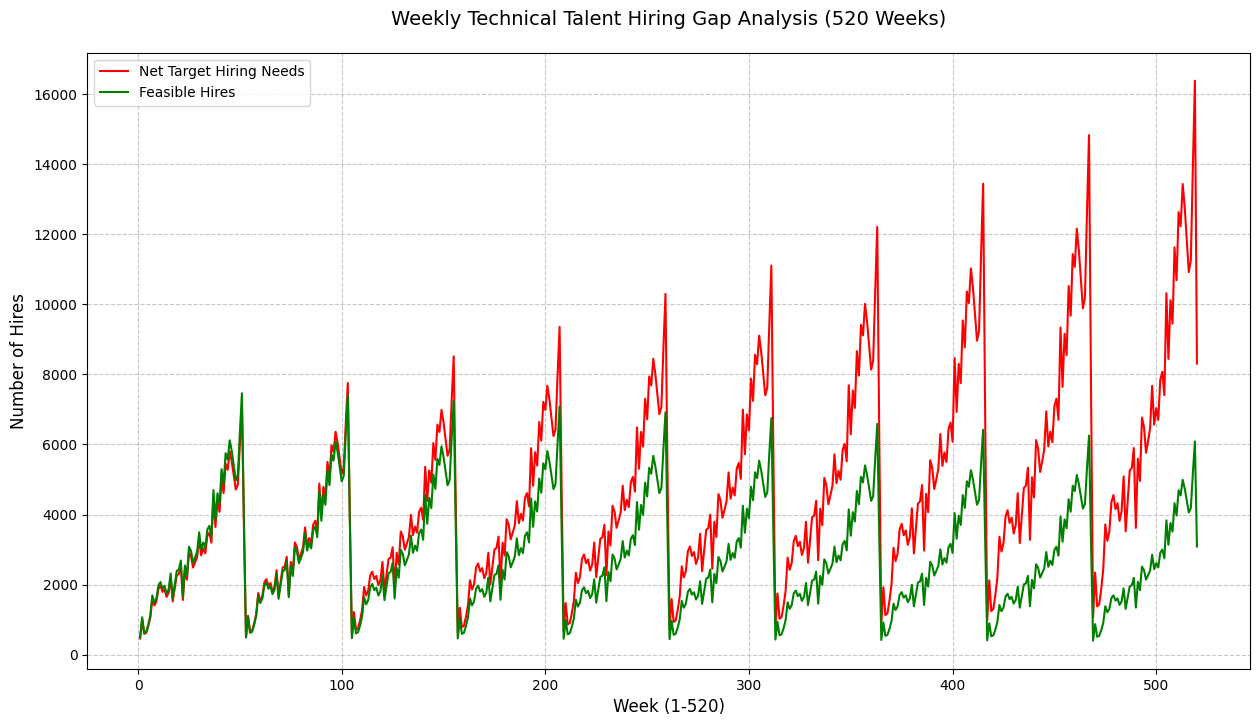

In [8]:
# Adjust the plot to have 520 weeks on the x-axis (ignoring years)
plt.figure(figsize=(15, 8))
plt.plot(range(1, 521), weekly_hiring_gap_df['Net_Target_Hires'], label='Net Target Hiring Needs', color='red')
plt.plot(range(1, 521), weekly_hiring_gap_df['Feasible_Hires'], label='Feasible Hires', color='green')

plt.title('Weekly Technical Talent Hiring Gap Analysis (520 Weeks)', fontsize=14, pad=20)
plt.xlabel('Week (1-520)', fontsize=12)
plt.ylabel('Number of Hires', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()